<a href="https://colab.research.google.com/github/lenkasaka/Rukol/blob/main/Copy_of_cvi%C4%8Denie3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

from sklearn.neighbors import KNeighborsClassifier

print(tf.__version__)



2.3.0


In [ ]:
# load Fashion MNIST from Keras repo
fashion_mnist = tf.keras.datasets.fashion_mnist
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data() # x su obrazky, y su labels

# add extra dimension (to have one channel)
x_train = x_train[:,:,:,None]
x_test = x_test[:,:,:,None]

x_train.shape, y_train.shape, x_test.shape, y_test.shape


(60000,)

In [ ]:
clothes_labels = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
                  'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
# kde sme zistili, ktory index je ktory label?

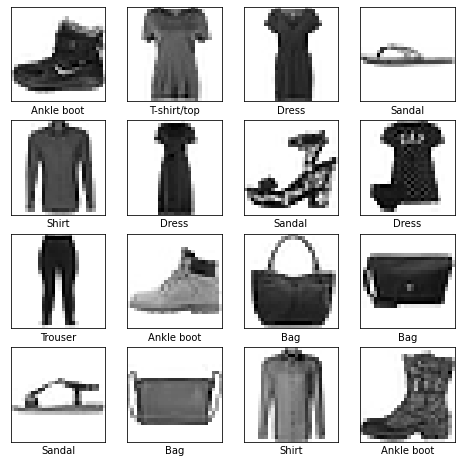

In [ ]:
def plot_image(x, title = ""):
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(x, cmap=plt.cm.binary)
  plt.xlabel(title)

plt.figure(figsize=(8,8))
for i in range(0, 160, 10):
  plt.subplot(4, 4, i // 10 + 1)
  plot_image(x_train[i].squeeze(), clothes_labels[y_train[i]])

In [ ]:
# Normalize values from [0, 255] to [0, 1] interval
x_train = x_train / 255
x_test = x_test / 255

y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)

y_train.shape


(60000, 10)

In [ ]:
def plot_loss(history, ylim=(0,1)):
  plt.plot(history.history['accuracy'], label='accuracy')
  plt.plot(history.history['val_accuracy'], label='val_accuracy')
  plt.ylim(ylim)
  plt.xlabel('Epoch')
  plt.ylabel('Accuracy')
  plt.legend()
  plt.grid(True)

In [ ]:
cnn_model = keras.Sequential([
      layers.Conv2D(filters = 32, kernel_size = (3,3),input_shape=(28,28,1), activation = 'relu'),
      layers.Dropout(0.5),
      layers.Flatten(),
      layers.Dense(64, activation='relu'),
      layers.Dense(128, activation='relu'),
      layers.Dense(64, activation='relu'),
      layers.Dropout(0.5),
      layers.Dense(10, activation='softmax')
])


Porovnanie jednotlivých architektúr pomocou **accuracy** (na test data set): 

1. (in.shape - 32 - 128 - 10):  **0.9160**
2. (in.shape - 32 - 64 - 128 - 64 - 64 - 10) - **0.9155** 
3. (in.shape - 32 - 32 - 128 - 64 - 10) - **0.9127**
4. (in.shape - 32 - 32 - 128 - 32 - 10) - **0.9106**
5. (in.shape - 32 - 64 - 32 - 10) - **0.8967**
6. (in.shape - 32 - 128 - 64 - 32 - 10) - **0.9037**
7. (in.shape - 32 - 128 - 64 - 64 - 10) - **0.9062**
8. (in.shape - 32 - 128 - 128 - 64 - 10) - **0.9062**

In [ ]:
cnn_model.compile(loss='categorical_crossentropy', 
                  optimizer=tf.keras.optimizers.Adam(),
                  metrics=['accuracy'])

In [ ]:
cnn_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
dropout_2 (Dropout)          (None, 26, 26, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 21632)             0         
_________________________________________________________________
dense_4 (Dense)              (None, 64)                1384512   
_________________________________________________________________
dense_5 (Dense)              (None, 128)               8320      
_________________________________________________________________
dense_6 (Dense)              (None, 64)                8256      
_________________________________________________________________
dropout_3 (Dropout)          (None, 64)               

In [ ]:
history = cnn_model.fit(
  x_train, y_train,
  batch_size = 256,
  epochs = 10,
  validation_data = (x_test, y_test),
  verbose = 1
)



Epoch 1/10
235/235 [==============================] - 40s 171ms/step - loss: 0.7123 - accuracy: 0.7589 - val_loss: 0.4068 - val_accuracy: 0.8544
Epoch 2/10
235/235 [==============================] - 44s 186ms/step - loss: 0.4078 - accuracy: 0.8631 - val_loss: 0.3397 - val_accuracy: 0.8795
Epoch 3/10
235/235 [==============================] - 42s 181ms/step - loss: 0.3404 - accuracy: 0.8829 - val_loss: 0.3131 - val_accuracy: 0.8864
Epoch 4/10
235/235 [==============================] - 40s 172ms/step - loss: 0.3082 - accuracy: 0.8937 - val_loss: 0.2991 - val_accuracy: 0.8939
Epoch 5/10
235/235 [==============================] - 40s 172ms/step - loss: 0.2833 - accuracy: 0.9015 - val_loss: 0.2865 - val_accuracy: 0.8986
Epoch 6/10
235/235 [==============================] - 40s 172ms/step - loss: 0.2684 - accuracy: 0.9061 - val_loss: 0.2896 - val_accuracy: 0.8991
Epoch 7/10
235/235 [==============================] - 40s 169ms/step - loss: 0.2519 - accuracy: 0.9104 - val_loss: 0.2770 - val_ac

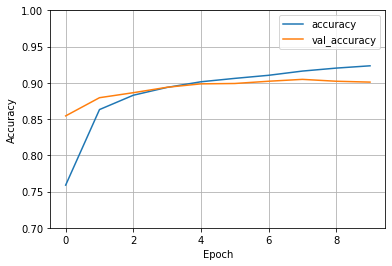

In [ ]:
plot_loss(history, ylim=(0.7, 1))


In [ ]:
predictions = cnn_model.predict(x_test) 

In [ ]:
print(predictions.shape)
print(y_test.shape)


(10000, 10)
(10000, 10)


Musíme transformovať "one-hot encoded labels" do 1D poľa, aby sme mohli vytvoriť "confusion matrix".


In [ ]:
cmPredictions = predictions.argmax(axis=1)
cmYTest = y_test.argmax(axis=1)

print(cmPredictions.shape)
print(cmYTest.shape)

(10000,)
(10000,)


#COFUSION MATRIX 

In [ ]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(cmYTest, cmPredictions)
print(cm)

[[860   0  19  31   6   1  69   0  14   0]
 [  2 972   0  20   3   0   1   0   2   0]
 [ 14   1 805  15 108   0  57   0   0   0]
 [ 15   1   6 943  22   0  13   0   0   0]
 [  1   1  38  43 887   0  28   0   2   0]
 [  0   0   0   0   0 968   0  20   0  12]
 [125   0  69  37 100   0 658   0  11   0]
 [  0   0   0   0   0   0   0 973   1  26]
 [  1   0   2   8   1   2   2   4 980   0]
 [  0   0   0   0   0   5   1  30   0 964]]


In [ ]:
for i in range(cm.shape[0]):
   cm[i,i] = 0

In [ ]:
coef = cm.argmax(axis = 1)
Maximum

for i in range(cm.shape[0]):

  print("%s was misclasified for %s: % i times." %(clothes_labels[i],clothes_labels[coef[i]],cm[i,coef[i]]))

print("---------------------------------------------------")

print("The worst out of all is % s missclasified for % s " %(clothes_labels[Maximum[0][0]],clothes_labels[Maximum[1][0]]))

T-shirt/top was misclasified for Shirt:  69 times.
Trouser was misclasified for Dress:  20 times.
Pullover was misclasified for Coat:  108 times.
Dress was misclasified for Coat:  22 times.
Coat was misclasified for Dress:  43 times.
Sandal was misclasified for Sneaker:  20 times.
Shirt was misclasified for T-shirt/top:  125 times.
Sneaker was misclasified for Ankle boot:  26 times.
Bag was misclasified for Dress:  8 times.
Ankle boot was misclasified for Sneaker:  30 times.
---------------------------------------------------


IndexError: ignored

In [ ]:
coef = cm.argmax(axis = 1)
coef
Maximum = cm.argmax()
Maximum

60

#16 najhorších predpovedí pomocou NN klasifikátora 

In [ ]:
maximas = np.amax(predictions,axis = 1)
maximas1 = maximas[cmYTest != cmPredictions]

maximas1 = maximas1[(-maximas1).argsort()][0:16]

args = []
for i in maximas1:
  args.append(np.where(((maximas == i) & (cmYTest != cmPredictions)))[0][0])
  

Na obrázku nižšie vidíme 16 najhoršie predikovaných obrázkov. Keď sa pozrieme, či majpu spoločný znak, tka vidíme, že naša neurónová sieť má problém s rozproznávaním obrázkov v rámci **rovnakej kategórie**. Tj. Ankle boot - zaradilo ako sandals, alebo **sneakers** ako **ankle boot**. Ďalej niektoré zle určené obrázky sú ťažko rozpoznateľné aj pre človeka, kvôli zle fotografii. To je napríklad **dress** bolo označené ako **trousers**. 

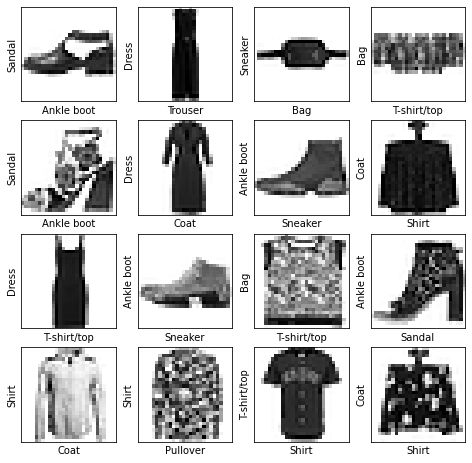

In [ ]:
plt.figure(figsize=(8,8))
for i in range(1,17):
  plt.subplot(4, 4, i)
  plt.ylabel(clothes_labels[cmPredictions[args[i-1]]])
  plot_image(x_test[args[i-1]].squeeze(), clothes_labels[cmYTest[args[i-1]]])

##KNN klasifikátor 

In [ ]:
x_train.shape

(60000, 28, 28, 1)

In [ ]:
# load Fashion MNIST from Keras repo
fashion_mnist = tf.keras.datasets.fashion_mnist
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()


x_train.shape, y_train.shape, x_test.shape, y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [ ]:
x_train1 = x_train.flatten().reshape(60000,28*28)
x_test1 = x_test.flatten().reshape(10000,28*28)

x_train1.shape, x_test1.shape

((60000, 784), (10000, 784))

In [ ]:
KNclf = KNeighborsClassifier()

KNclf.fit(x_train1, y_train)
print(KNclf)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')


In [ ]:
from sklearn import metrics

predictions = KNclf.predict(x_test1)

print("Accuracy:",metrics.accuracy_score(y_test, predictions))

Accuracy: 0.8554


Použité zdroje: 
1. https://www.datacamp.com/community/tutorials/k-nearest-neighbor-classification-scikit-learn
2. https://www.python-course.eu/confusion_matrix.php
3. https://www.pyimagesearch.com/2016/08/08/k-nn-classifier-for-image-classification/